In [5]:
%matplotlib inline

from neo import io
import quantities as qn
import matplotlib.pyplot as plt
import numpy as np

In [6]:
import scipy

In [7]:
from neo import (Block, Segment, ChannelIndex,AnalogSignal)

In [8]:
import nixio

In [49]:
nombre="../DatosIntraCelularesFelipe/C1_21_2_17/PP2_H1hz_C1_21_2_17.abf"

In [50]:
archivo=io.AxonIO(filename=nombre)

In [51]:
LosDatos=archivo.read_block(lazy=False, cascade=True)

In [52]:
LosDatos.size['segments']

56

In [53]:
ejemplo=LosDatos.segments[8].analogsignals[0]

In [54]:
?ejemplo

In [55]:
for i in ejemplo:
    if(i>100):
        print(i)

[ 233.45402527] pA
[ 166.31535339] pA


Python cuenta desde 0. np.where te da la lista de índices donde se cumple una condicion. Los objetos tipo analogsignal son complejos, así que nos da una doble lísta. De la primera parte de la lista están los índices **TEMPORALES** de los evento que cumplen la condición descrita en where. De ahí tomamos el primero de todos, es decir... el cero. 

In [56]:
np.where(ejemplo>60)[0][0]

165

In [57]:
np.where(ejemplo>100)[0][1]

1171

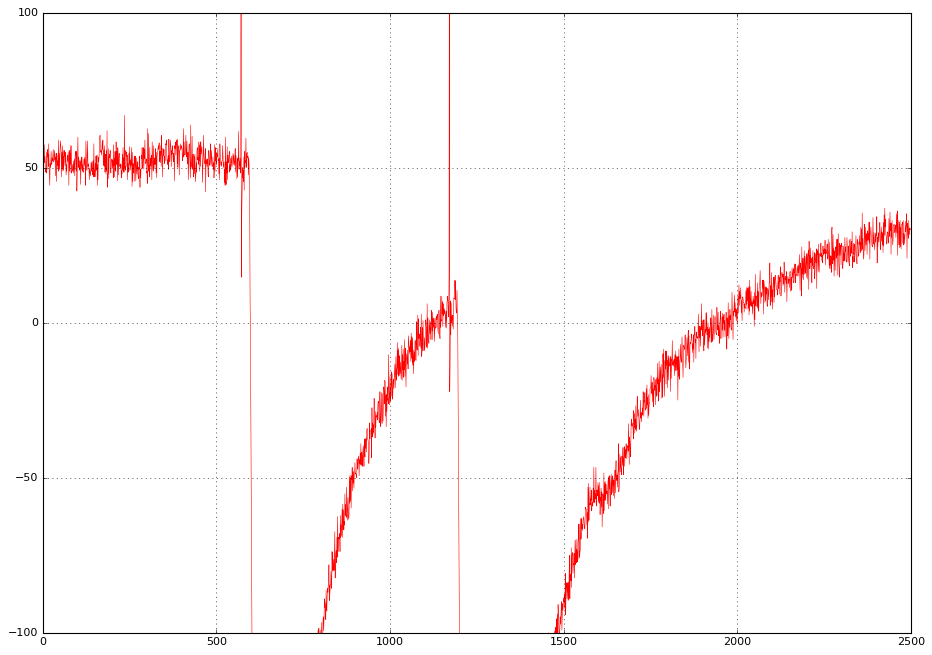

In [60]:
plt.figure(figsize=(14,10))
plt.ylim(-100,100)
plt.grid()
plt.plot(ejemplo, c="red", lw="0.5")
plt.show()

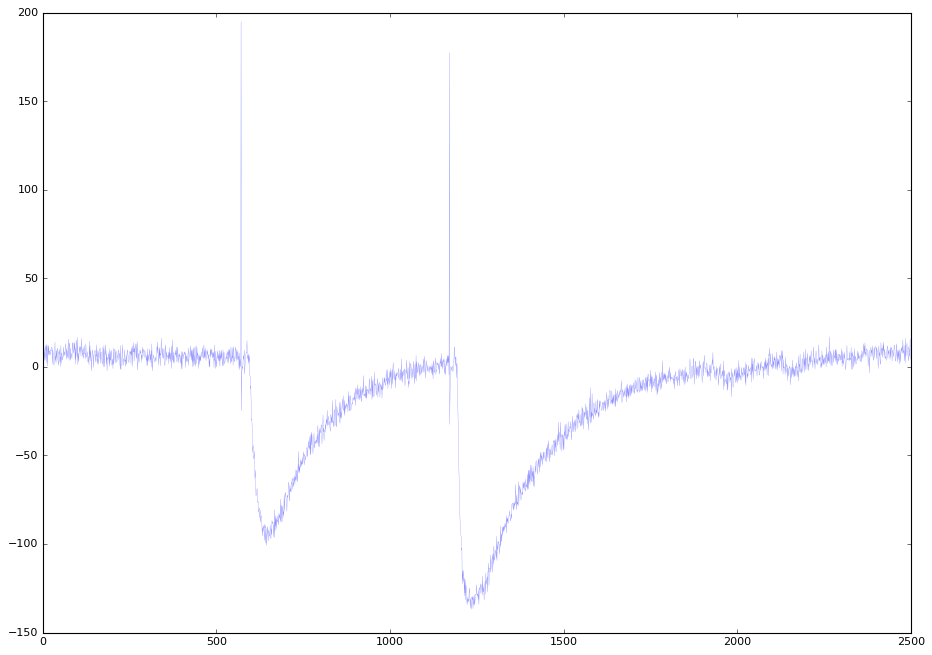

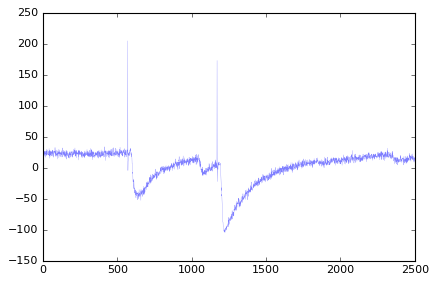

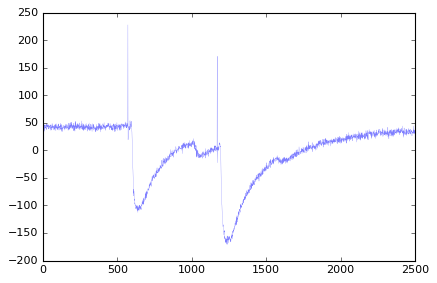

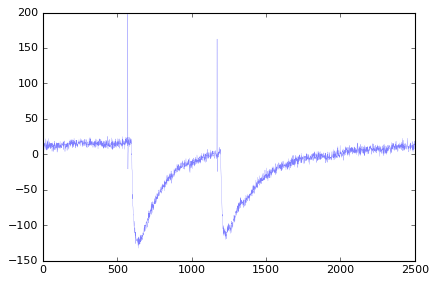

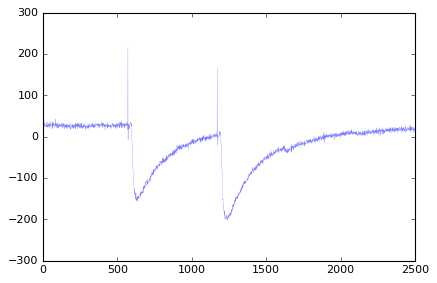

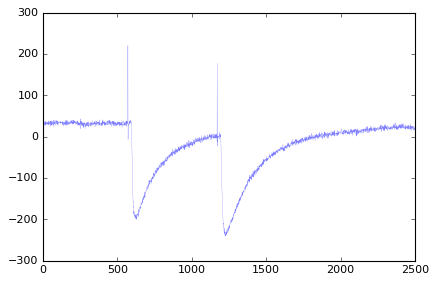

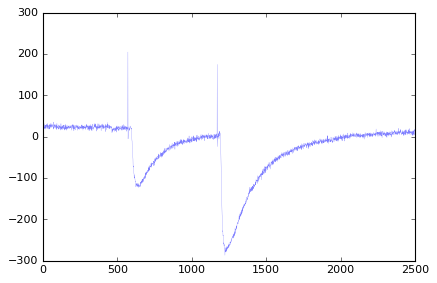

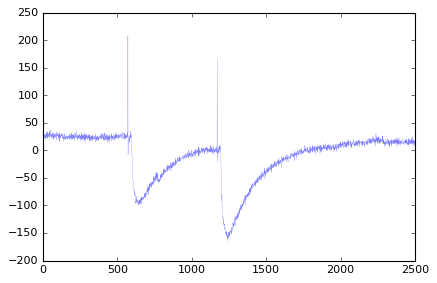

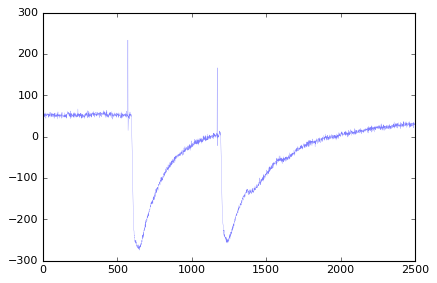

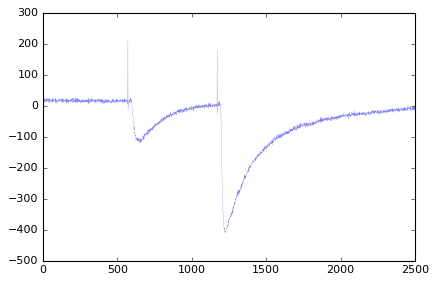

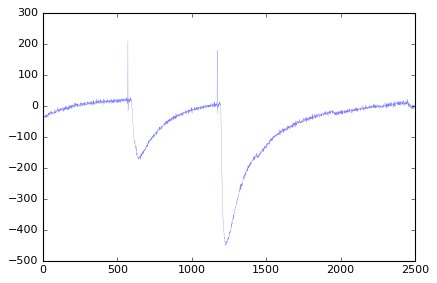

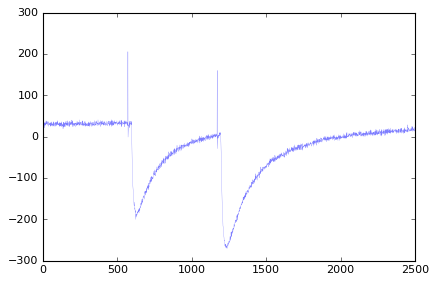

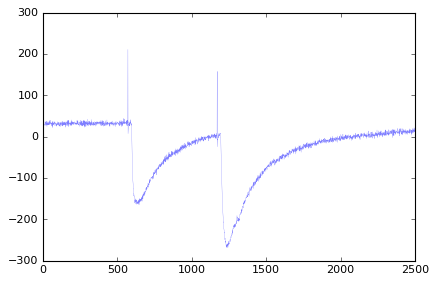

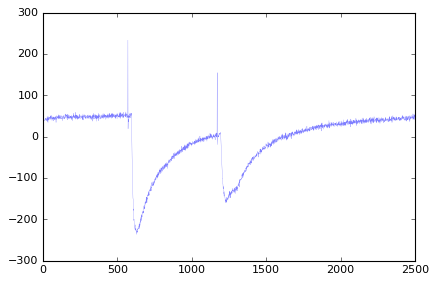

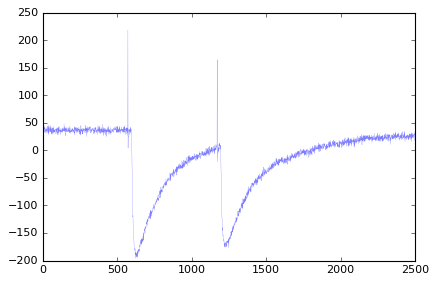

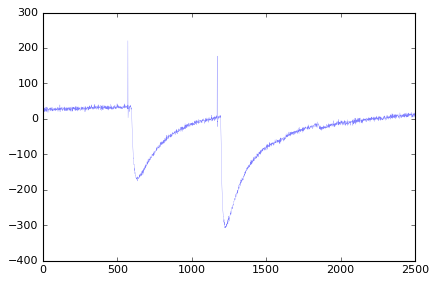

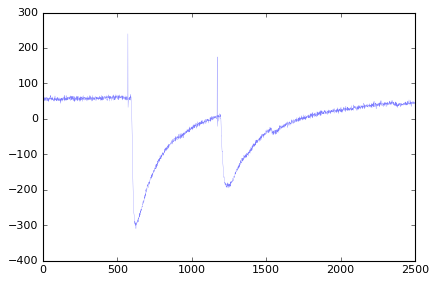

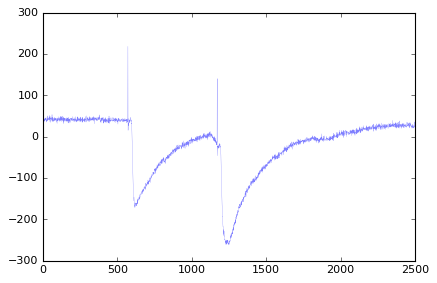

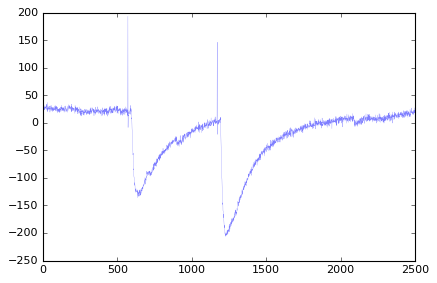

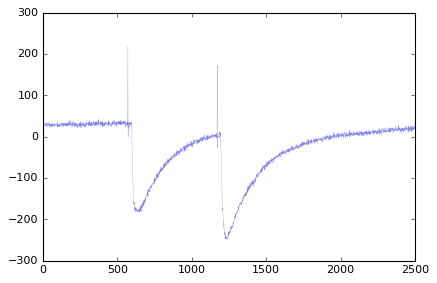

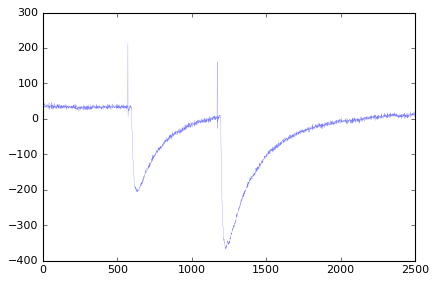

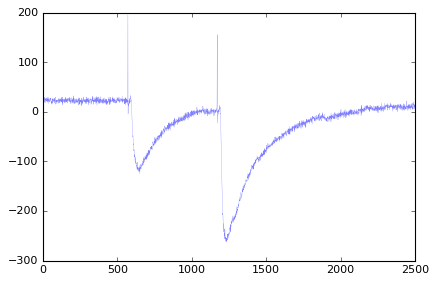

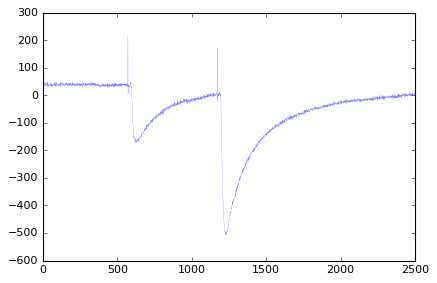

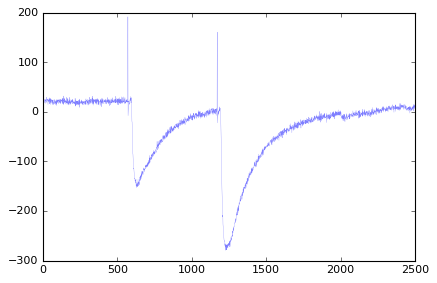

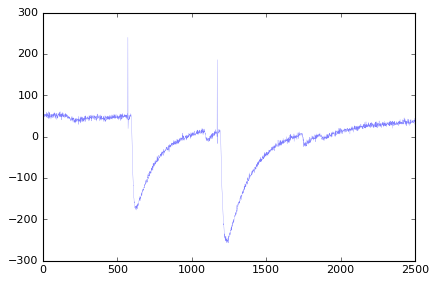

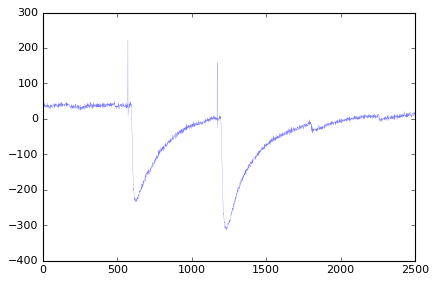

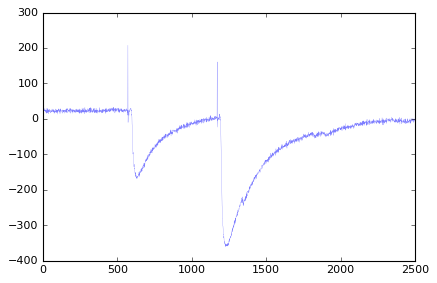

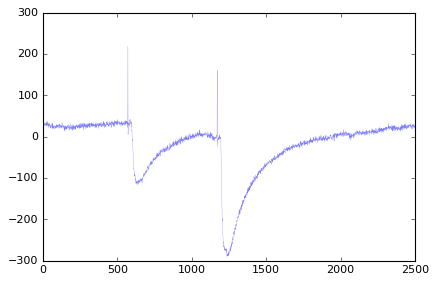

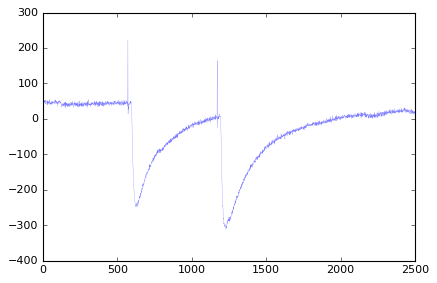

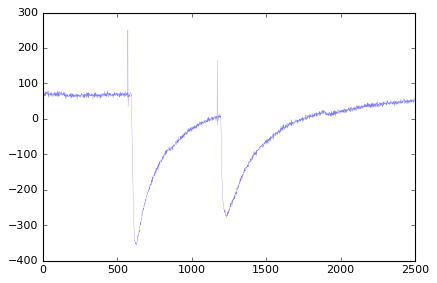

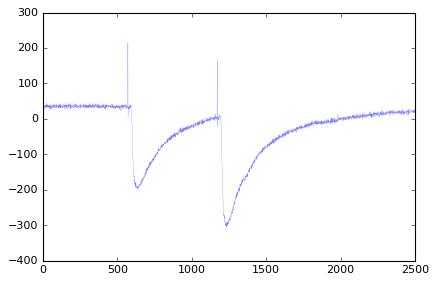

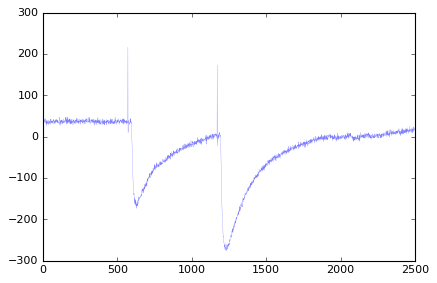

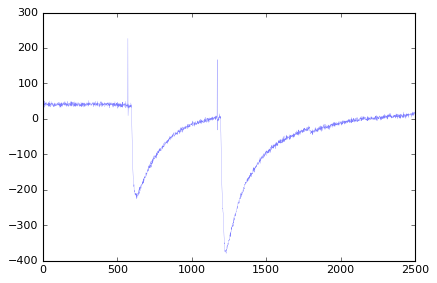

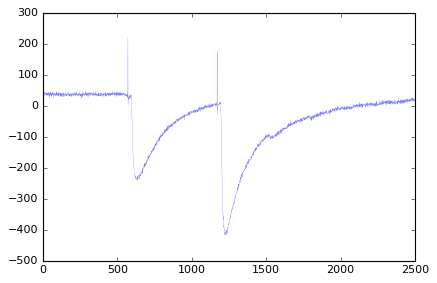

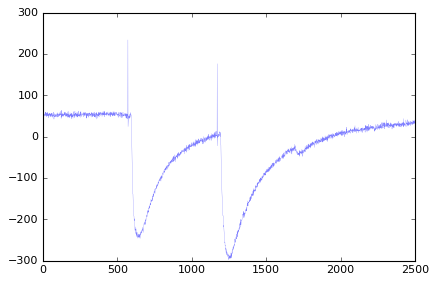

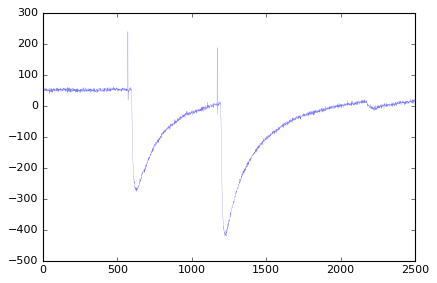

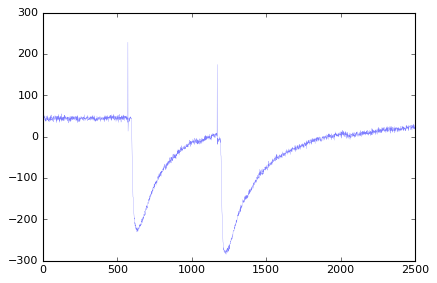

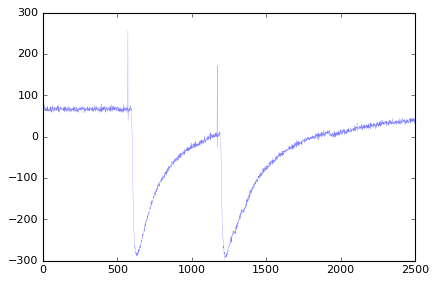

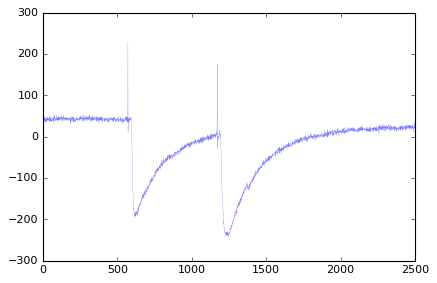

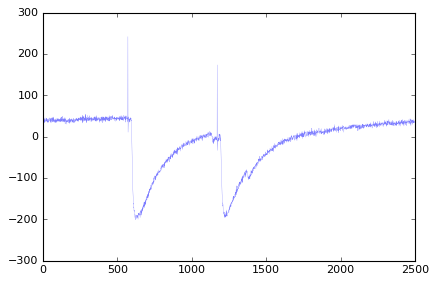

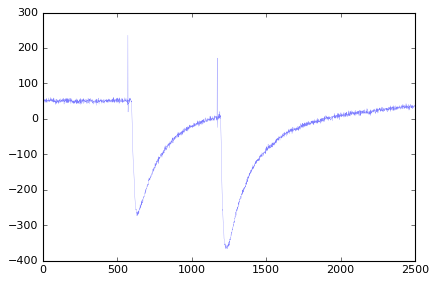

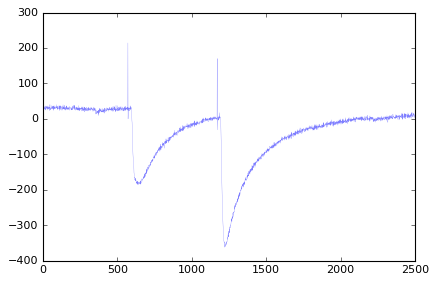

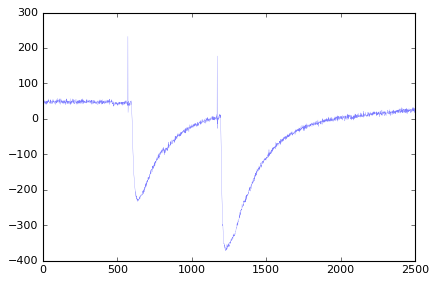

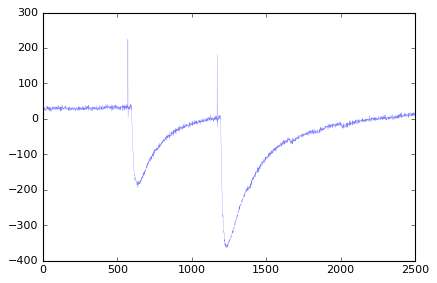

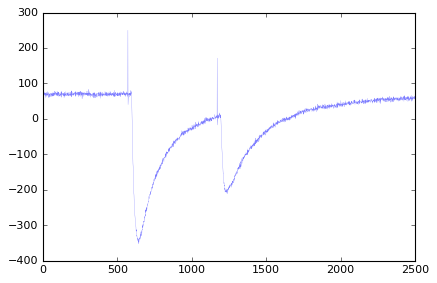

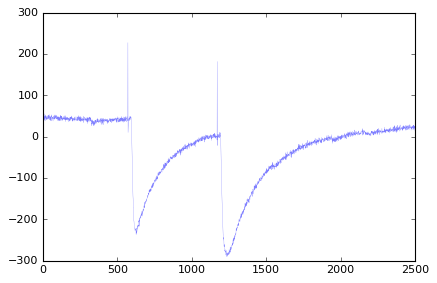

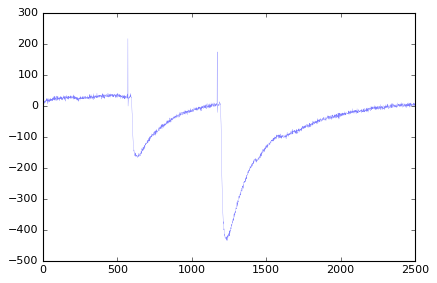

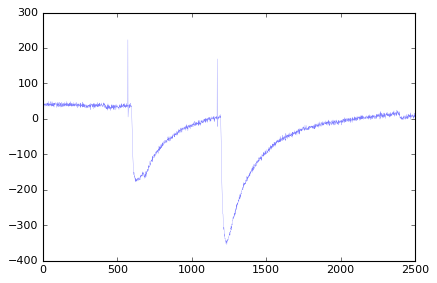

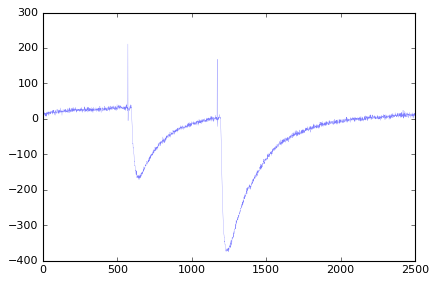

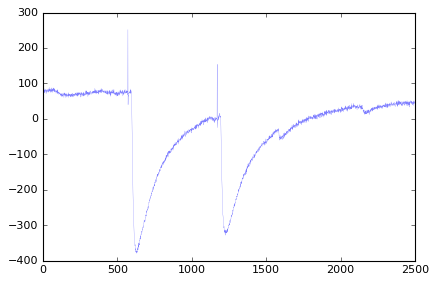

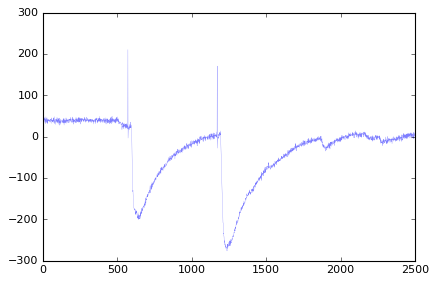

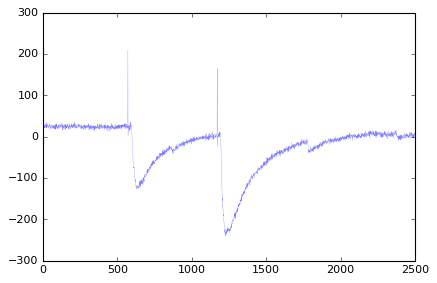

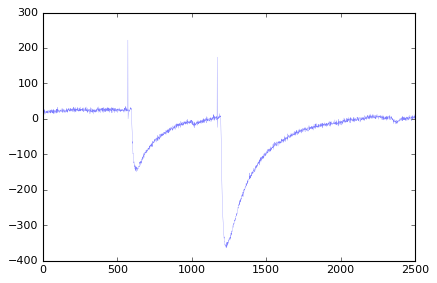

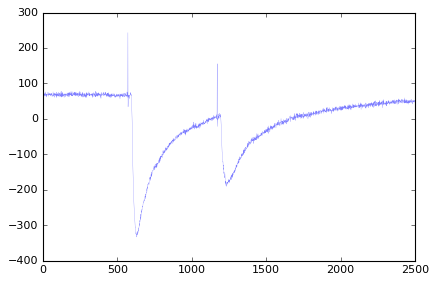

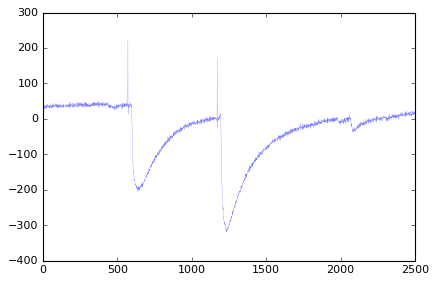

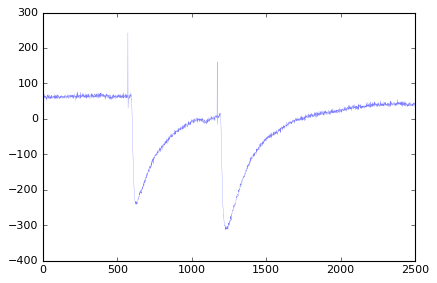

In [37]:
plt.figure(figsize=(14,10))
for i in LosDatos.segments:
    plt.plot(i.analogsignals[0],lw=0.25,alpha=0.5)
    plt.show()

In [20]:
def detectaestimulo(datos, umbral=100, cual=0):
    "Funcion que da el primer estimulo que pasa de un umbral de un analogsignal"
    primer=np.where(datos>umbral)[0][cual]
    primer=int(primer)
    return primer

In [21]:
def recortasegnal(datos, indice, desde=50, hasta=500):
    "Funcion que nos recorta una señal a partir de un indice"
    result=datos[indice-desde:indice+hasta]
    return result

In [61]:
def nuevobloque(bloqueviejo,umbral=100, desde=50,hasta=500, cual=0):
    "funcion que a partir de un Bloque de neo crea otro recortado y alineado"
    result=Block()
    for j in bloqueviejo.segments:
        #Toma el primer canal (activo), de cada analogsignal y la recorta
        estimindex=detectaestimulo(j.analogsignals[0], umbral, cual)
        cacho=recortasegnal(j.analogsignals[0],estimindex, desde, hasta)
        result.segments.append(cacho)
    return result

In [62]:
otroalinaeado=nuevobloque(LosDatos)

ValueError: Unable to convert between units of "dimensionless" and "pA"

In [55]:
bloquealineado=nuevobloque(LosDatos)

AttributeError: 'Block' object has no attribute 'AnalogSignal'

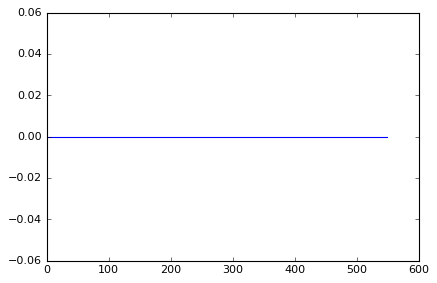

In [21]:
guardar=io.RawBinarySignalIO("tuabuela.raw")

In [22]:
guardar2=io.NixIO("guardadito.nix", 'rw')

In [53]:
guardar2.write(bloquealineado)

AttributeError: 'AnalogSignal' object has no attribute 'analogsignals'

In [138]:
plt.figure(figsize=(14,10))
for j in bloquealineado.segments:
    plt.plot(j)
for h in otroalinaeado.segments:
    plt.plot(h ls="--" )

SyntaxError: invalid syntax (<ipython-input-138-948c20740139>, line 5)

In [69]:
def listaminimos(datos):
    cuantos=datos.size["segments"]
    result=np.zeros(cuantos)?np.where
    for j in range(cuantos):
        result[j]=np.min(datos.segments[j])
    return result

In [ ]:
dibujo=plt.figure(figsize=(14,10))
with plt.xkcd():
    for j in datos.segments:
        estimindex=detectaestimulo(j.analogsignals[0])
        cacho=recortasegnal(j.analogsignals[0],estimindex)
        plt.plot(cacho,lw=0.3, marker="o")
    plt.show()

In [86]:
turur=listaminimos(bloquealineado)

In [81]:
def minpromvar(datos):
    minimos=listaminimos(datos)
    result=(np.mean(minimos),np.var(minimos))
    return result

In [82]:
tuabuela=minpromvar(bloquealineado)

In [132]:
otrabuela=minpromvar(otroalinaeado)

In [133]:
tuabuela

(-28.027004623413085, 110.14183872458948)

In [134]:
otrabuela

(-26.867337036132813, 316.4031070956504)